# Analyse exploratoire

## Import des outils / jeu de données

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.utils import init_notebook

In [ ]:
init_notebook()

In [ ]:
df = pd.read_csv(
    "data/kickstarter_1.csv",
    parse_dates=True,
)

## Présentation

**Plan de la présentation**

**1) Introduction**
- présentation du jeu de données
- modélisation sous forme d'analyse de survie
- définition de la problématique

**2) Estimation univariée**
- Non-paramétrique
- Paramétrique

**3) Régression multivariée**
- Non-paramétrique
- Paramétrique
- Machine Learning

**4) Conclusion**
- réponse à la problématique

### Jeu de données

Le jeu de données contient une liste de **18 143 projets Kickstarter** menés entre le _15 décembre 2013 et le 15 juin 2014_.   

Pour chaque projet, nous disposons notamment de :
- **quand son objectif a été atteint: `day_succ`**
- **si l'objectif a été atteint: `Status`**
- **si le projet dispose d'une vidéo promotionnelle : `has_video`**
- l'objectif financier: `goal`
- si le projet a un compte facebook: `facebook_connected`
- le nombre de *followers* du projet: `facebook_friends` 
- le nombre de financeurs: `backers`
- la catégorie du projet (art, cuisine, technologie, ...): `cat`
- etc.

Il est important de préciser que le jeu de données a été mis à l'échelle pour les variables quantitatives (*scaling*), d'où des valeurs décimales pour des variables entières.

#### Modélisation

* **$T$** : variable aléatoire modélisant la **date de financement** (succès du projet).
* fonction de survie $P(T > t)$ : probabilité que le projet n'ait pas encore été financé au temps $t$
* **censure** (à droite) : les projets n'ont pas été financé dans le temps imparti _(mais auraient pu être financés s'ils avaient eu plus de temps)_

#### Présentation des variables

In [ ]:
print(
    f"Il y a {df.shape[1]} variables "
    f"qui décrivent {df.shape[0]} projets kickstarter."
)

Il y a 56 variables qui décrivent 4175 projets kickstarter.


In [ ]:
# df.info()

Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

In [ ]:
var_categoriques = (
    [f"cat{i}" for i in range(1, 16)]
    + [f"curr{i}" for i in range(1, 7)]
    + ["Status", "facebook_connected", "has_video"]
)

In [ ]:
var_numeriques = df.columns

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [ ]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

Nous convertissons les variables au format date.

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

## Visualisations

<Axes: xlabel='day_succ', ylabel='Count'>

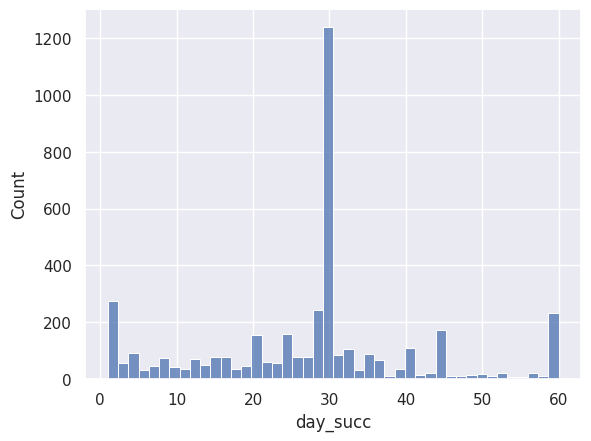

In [ ]:
sns.histplot(df["day_succ"])

Text(0.5, 0, 'Statut des projets')

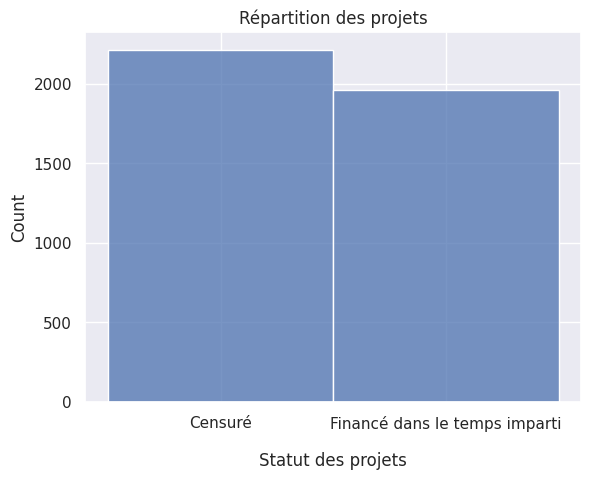

In [ ]:
plt.title("Répartition des projets")

sns.histplot(df["Status"])

plt.xticks([0, 1], ["Censuré", "Financé dans le temps imparti"])
plt.xlabel("Statut des projets", labelpad=15)  # labelpad add vertical space

## Problématique

Voici les deux questions qui guident notre projet :

**1)** Peut-on prédire si un projet sera financé ? À quelle date ?

**2)** Quel est l'impact d'une vidéo promotionnelle sur le succès d'un projet ?

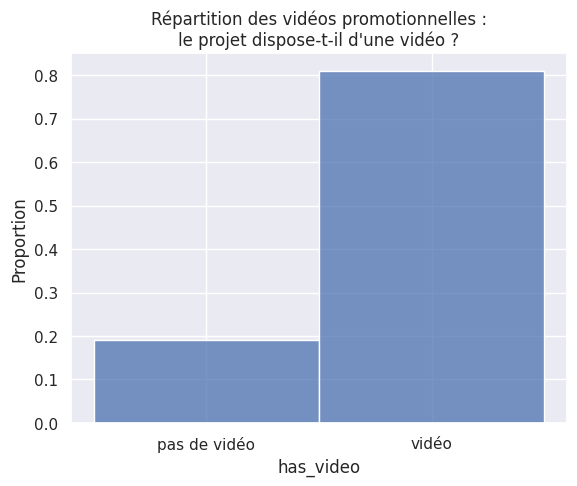

In [ ]:
plt.title(
    "Répartition des vidéos promotionnelles :\nle projet dispose-t-il d'une vidéo ?"
)

sns.histplot(df["has_video"], stat="proportion")

plt.xticks([0, 1], ["pas de vidéo", "vidéo"])
plt.show()

In [ ]:
# old problematic # Dans une première **analyse univariée**, nous chercherons à **modéliser la fonction de survie du financement d'un projet Kickstarter**, c'est-à-dire la probabilité que le projet n'ait pas encore été financé, en fonction de sa durée de vie, en jours. # # Dans une deuxième **analyse multivariée**, nous déterminerons **comment les différents paramètres des projets Kickstarter influencent-ils la durée nécessaire pour atteindre leur objectif** de financement ou leur échec dans le temps imparti ?